# Fintech Project 1
## The effects of COVID-19 on Cryptocurrencies

#### Team: ShunZhou Tan, Ghulam Mundh, Joyce Mbika, Sonali Goyal

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
from chart_studio.plotly import plot, iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from panel.interact import interact
from panel import widgets

import os
import requests
import pandas as pd
import json

from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from poloniex import Poloniex
import time
from datetime import datetime, timezone
import numpy as np
from pathlib import Path
import seaborn as sns
import warnings 
from sklearn.linear_model import LinearRegression
import time

warnings.filterwarnings("ignore")
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
load_dotenv()

True

### Import Data Files
### Btc first

In [20]:
btc = pd.read_csv("btc.csv",index_col="date",parse_dates=True,infer_datetime_format=True,)
btc.head(5)

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0,0,0,nan,nan,nan,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
2009-01-04,0,0,0,nan,nan,nan,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
2009-01-05,0,0,0,nan,nan,nan,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
2009-01-06,0,0,0,nan,nan,nan,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
2009-01-07,0,0,0,nan,nan,nan,0.00,nan,nan,nan,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan


In [30]:
btc_cleaning = btc.dropna().reset_index()
btc_cleaning.head(5)

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2011-07-18,27778,170,4578379,26931.64,1.94,93349306.17,48066813.30,1563028.00,0.00,...,4692620.24,139.13,1896.48,0.35,4.77,3298186.15,44955996.43,0.10,0.04,0.12
1,2011-07-19,25356,142,4178498,29426.04,1.96,94777954.60,48248040.06,1588241.37,0.00,...,2724540.74,110.41,1526.40,0.31,4.32,2735641.93,37819688.40,0.10,0.04,0.11
2,2011-07-20,25461,149,3834661,25735.98,1.96,93875750.55,47823361.80,1690895.80,0.00,...,3359165.05,22.32,305.24,0.20,2.74,541171.30,7402320.01,0.10,0.04,0.11
3,2011-07-21,25378,152,3672287,24159.78,1.95,93522652.13,47910773.53,1690895.80,0.00,...,1875060.22,54.06,735.91,0.13,1.77,1329537.80,18097413.85,0.10,0.04,0.11
4,2011-07-22,24428,151,3850125,25497.52,1.96,94222033.04,47996226.32,1690895.80,0.00,...,2167659.42,65.21,893.33,0.50,6.85,1554628.65,21296154.09,0.10,0.04,0.11


In [34]:
# Take the date column out and seperate as to different variables
year = btc_cleaning['date'].dt.year
month = btc_cleaning['date'].dt.month
day = btc_cleaning['date'].dt.day
date = {"year":year,"month":month,"day":day}

# Concat the data together with the newly created variable
date_date = pd.DataFrame(date)
btc_file = pd.concat([date_date,btc_cleaning],axis="columns",join="outer")
btc_new_new = btc_file[["year","month","day","date","AdrActCnt","PriceUSD"]]
btc_test = btc_new_new.drop(['date'],axis=1)
btc_new = btc_new_new.drop(['day','date'],axis=1)
btc_new_new.head(5)

,year,month,day,date,AdrActCnt,PriceUSD
0,2011,7,18,2011-07-18,27778,13.63
1,2011,7,19,2011-07-19,25356,13.82
2,2011,7,20,2011-07-20,25461,13.68
3,2011,7,21,2011-07-21,25378,13.61
4,2011,7,22,2011-07-22,24428,13.70


In [35]:
# Finding the average through out the months for each year after 2015
avg_month = btc_new.loc[btc_new['year'] > 2015,:].groupby(["year","month"]).mean()
avg_month.head(5)

AdrActCnt  PriceUSD
year month                     
2016 1      464577.03    411.04
     2      512159.76    403.38
     3      466616.68    414.86
     4      468173.17    435.39
     5      474928.55    462.95

In [36]:
# Assign new variables that corrispond to the plot that can be used later
adract = avg_month.hvplot(y="AdrActCnt")

In [37]:
price = avg_month.hvplot(y="PriceUSD")

In [38]:
adractprice = avg_month.hvplot(x="AdrActCnt",y="PriceUSD")

In [39]:
# Trying different techniques to plot and see the relation
avg_month["test"] = avg_month["AdrActCnt"] / avg_month["PriceUSD"]
avg_month.head(5)

AdrActCnt  PriceUSD    test
year month                             
2016 1      464577.03    411.04 1130.25
     2      512159.76    403.38 1269.68
     3      466616.68    414.86 1124.76
     4      468173.17    435.39 1075.30
     5      474928.55    462.95 1025.87

In [40]:
test = avg_month.hvplot(y="test")

In [41]:
adract * test

:Overlay
   .Curve.I  :Curve   [year]   (AdrActCnt)
   .Curve.II :Curve   [year]   (test)

In [42]:
# Taking the data that relates to the Covid 19 
only_2020 = btc_test.loc[btc_test['year'] > 2019,:].drop("year",axis=1).groupby(["month","day"]).mean()
only_2020.head()

AdrActCnt  PriceUSD
month day                     
1     1       524360   7170.63
      2       671016   6946.83
      3       721747   7315.31
      4       611397   7343.16
      5       597061   7345.53

In [43]:
#Visualize the data
only_2020.hvplot()

:NdOverlay   [Variable]
   :Curve   [month]   (value)

In [282]:
#only_2020 = only_2020.reset_index()
#px.bar(only_2020,x="AdrActCnt",y="PriceUSD",barmode="group",facet_row="month",title="BTC",height=900,width=1350,labels={"AdrActCnt":"AdrActCnt","PriceUSD":"PriceUSD"})

In [44]:
# Since the data before does not look good and does the job that is needed
# Another dataframe is created to store the wanted data in the desired form
btc_new_new["yearmonth"] = btc_new_new["date"].dt.strftime("%Y-%m")

before_and_after = (btc_new_new
                    .reset_index()
                    .drop("day",axis=1)
                    .loc[btc_new_new['year'] > 2018,:]
                    .groupby(["year","month"])
                    .agg({"AdrActCnt":"mean",
                         "PriceUSD":"mean",
                         "yearmonth":"first"})
                    .reset_index()
                    .drop(["year","month"],axis=1)
                    .set_index("yearmonth")
                    )


#before_and_after = pd.concat([date_con,before_and_after],join="outer",axis="columns").drop(["year","month"],axis=1).set_index
before_and_after.head()

,AdrActCnt,PriceUSD
yearmonth,,
2019-01,585617.19,3659.23
2019-02,644804.11,3659.20
2019-03,680585.32,3923.42
2019-04,742951.40,5145.80
2019-05,813907.13,7292.92


In [45]:
# Taking the data after August 2019 to recent to see the changes
before_and_after_new = before_and_after.iloc[7::,:]
before_and_after_new.head()
before_and_after_new.hvplot.bar(y=["AdrActCnt","PriceUSD"],
                                rot=90,
                                color=["blue","red"],
                                height=600,width=1250,
                                title = "Histogram for BTC Address Action Count and Price Change",
                                xlabel = "Year/Month",
                                ylabel = "Address Action Count/Price in USD")

:Bars   [yearmonth,Variable]   (value)

In [46]:
# Since plotly express cannot self define legends
# Here is to use another column that specifies the name
before_and_after_new["address_count"] = "Address Action Count"
before_and_after_new["price"] = "Price in USD"
before_and_after_new.head()

,AdrActCnt,PriceUSD,address_count,price
yearmonth,,,,
2019-08,710044.84,10628.74,Address Action Count,Price in USD
2019-09,717043.17,9792.42,Address Action Count,Price in USD
2019-10,695897.00,8387.16,Address Action Count,Price in USD
2019-11,720745.70,8339.69,Address Action Count,Price in USD
2019-12,697138.42,7246.17,Address Action Count,Price in USD


# Using Plotly Express to Plot two or more graphs at the same time
## This part of code is important because Plotly express does not support multiple axes yet
## But this code here makes it work

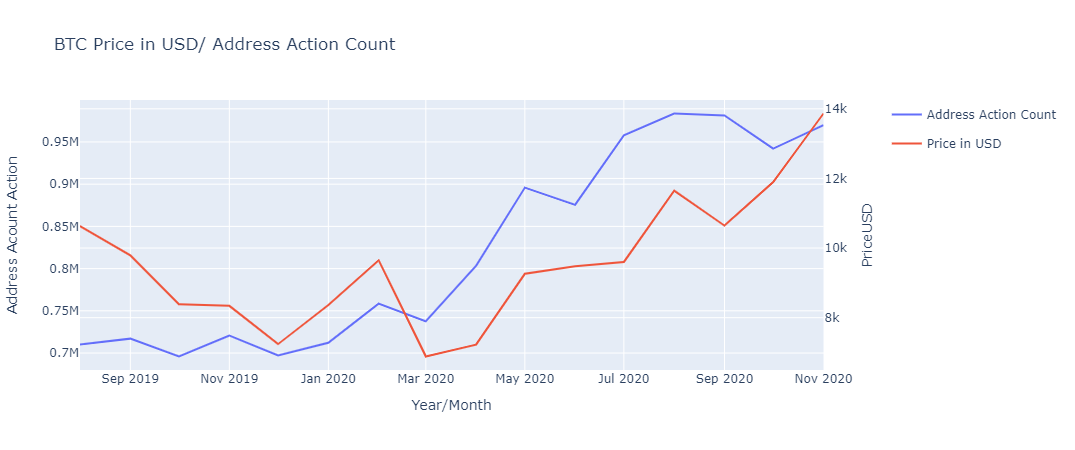

In [323]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_new, x= "yearmonth", y="AdrActCnt",color="address_count")
fig2 = px.line(before_and_after_new, x="yearmonth", y="PriceUSD", color="price")

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "BTC Price in USD/ Address Action Count")
subfig.show()

In [296]:
# Using hvplot to plot the graph side by side
adrcount = before_and_after_new.hvplot.line(x="yearmonth",
                                            y="AdrActCnt",
                                            rot=90,
                                            color=["blue","red"],
                                            title = "BTC Address Action Count 2019/08 - 2020/11",
                                            xlabel = "Year/Month",
                                            ylabel = "Address Action Count")#,
                                 #height=600,width=1250)

pricecount = before_and_after_new.hvplot.line(x="yearmonth",
                                              y="PriceUSD",
                                              rot=90,
                                              color=["blue","red"],
                                              title = "BTC Price Change 2019/08 - 2020/11",
                                              xlabel="Year/Month",
                                              ylabel="Price in USD")#,
                                 #height=600,width=1250)
    
adrcount + pricecount
#pct_change
#potentially log scale

:Layout
   .Curve.I  :Curve   [yearmonth]   (AdrActCnt)
   .Curve.II :Curve   [yearmonth]   (PriceUSD)

In [278]:
#Trying different methods to see the change
beforeafterpct = before_and_after_new.pct_change().dropna()
beforeafterpct.head(20)

,AdrActCnt,PriceUSD
yearmonth,,
2019-09,0.01,-0.08
2019-10,-0.03,-0.14
2019-11,0.04,-0.01
2019-12,-0.03,-0.13
2020-01,0.02,0.15
2020-02,0.07,0.15
2020-03,-0.03,-0.29
2020-04,0.09,0.05
2020-05,0.12,0.28


In [281]:
# Apply changes to the data to see the difference
adrpct = beforeafterpct.hvplot.line(x="yearmonth",
                                 y="AdrActCnt",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)
pricepct = beforeafterpct.hvplot.line(x="yearmonth",
                                 y="PriceUSD",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)

beforeafterpctlog = beforeafterpct.apply(np.log)

adrpctlog = beforeafterpctlog.hvplot.line(x="yearmonth",
                                 y="AdrActCnt",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)
pricepctlog = beforeafterpctlog.hvplot.line(x="yearmonth",
                                 y="PriceUSD",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)

adrpct+pricepct
#adrpctlog+pricepctlog

###arima


#time series analysis
#stationarity

#stats model
#https://www.statsmodels.org/stable/index.html

:Layout
   .Curve.I  :Curve   [yearmonth]   (AdrActCnt)
   .Curve.II :Curve   [yearmonth]   (PriceUSD)

In [269]:
beforeafterlog = before_and_after_new.apply(np.log)
beforeafterlog.head(5)

,AdrActCnt,PriceUSD
yearmonth,,
2019-08,13.47,9.27
2019-09,13.48,9.19
2019-10,13.45,9.03
2019-11,13.49,9.03
2019-12,13.45,8.89


In [270]:
adrlog = beforeafterlog.hvplot.line(x="yearmonth",
                                 y="AdrActCnt",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)
pricelog = beforeafterlog.hvplot.line(x="yearmonth",
                                 y="PriceUSD",
                                 rot=90,
                                 color=["blue","red"])#,
                                 #height=600,width=1250)
adrlog+pricelog

:Layout
   .Curve.I  :Curve   [yearmonth]   (AdrActCnt)
   .Curve.II :Curve   [yearmonth]   (PriceUSD)

### Regression Part

### Trying different things

In [157]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4324 entries, 2009-01-03 to 2020-11-04
Data columns (total 42 columns):
AdrActCnt             4324 non-null int64
BlkCnt                4324 non-null int64
BlkSizeByte           4324 non-null int64
BlkSizeMeanByte       4318 non-null float64
CapMVRVCur            3763 non-null float64
CapMrktCurUSD         3763 non-null float64
CapRealUSD            4324 non-null float64
DiffMean              4318 non-null float64
FeeMeanNtv            4066 non-null float64
FeeMeanUSD            3763 non-null float64
FeeMedNtv             4066 non-null float64
FeeMedUSD             3763 non-null float64
FeeTotNtv             4324 non-null float64
FeeTotUSD             3763 non-null float64
HashRate              4318 non-null float64
IssContNtv            4318 non-null float64
IssContPctAnn         4318 non-null float64
IssContUSD            3763 non-null float64
IssTotNtv             4318 non-null float64
IssTotUSD             3763 non-null float64
N

In [158]:
btc.isnull().sum()

AdrActCnt               0
BlkCnt                  0
BlkSizeByte             0
BlkSizeMeanByte         6
CapMVRVCur            561
CapMrktCurUSD         561
CapRealUSD              0
DiffMean                6
FeeMeanNtv            258
FeeMeanUSD            561
FeeMedNtv             258
FeeMedUSD             561
FeeTotNtv               0
FeeTotUSD             561
HashRate                6
IssContNtv              6
IssContPctAnn           6
IssContUSD            561
IssTotNtv               6
IssTotUSD             561
NVTAdj                260
NVTAdj90              650
PriceBTC                0
PriceUSD              561
ROI1yr                926
ROI30d                591
SplyCur                 0
SplyExpFut10yrCMBI      6
SplyFF                  0
TxCnt                   0
TxTfrCnt                0
TxTfrValAdjNtv          0
TxTfrValAdjUSD        561
TxTfrValMeanNtv       258
TxTfrValMeanUSD       561
TxTfrValMedNtv        258
TxTfrValMedUSD        561
TxTfrValNtv             0
TxTfrValUSD 

In [164]:
btc_clean.head(5)

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
date,,,,,,,,,,,,,,,,,,,,,
2011-07-18,27778,170,4578379,26931.64,1.94,93349306.17,48066813.30,1563028.00,0.00,0.02,...,4692620.24,139.13,1896.48,0.35,4.77,3298186.15,44955996.43,0.10,0.04,0.12
2011-07-19,25356,142,4178498,29426.04,1.96,94777954.60,48248040.06,1588241.37,0.00,0.02,...,2724540.74,110.41,1526.40,0.31,4.32,2735641.93,37819688.40,0.10,0.04,0.11
2011-07-20,25461,149,3834661,25735.98,1.96,93875750.55,47823361.80,1690895.80,0.00,0.02,...,3359165.05,22.32,305.24,0.20,2.74,541171.30,7402320.01,0.10,0.04,0.11
2011-07-21,25378,152,3672287,24159.78,1.95,93522652.13,47910773.53,1690895.80,0.00,0.02,...,1875060.22,54.06,735.91,0.13,1.77,1329537.80,18097413.85,0.10,0.04,0.11
2011-07-22,24428,151,3850125,25497.52,1.96,94222033.04,47996226.32,1690895.80,0.00,0.02,...,2167659.42,65.21,893.33,0.50,6.85,1554628.65,21296154.09,0.10,0.04,0.11


In [2]:
btc_clean = btc.dropna().reset_index()
year = btc_clean['date'].dt.year
month = btc_clean['date'].dt.month
day = btc_clean['date'].dt.day
date = {"year":year,"month":month,"day":day}

date_date = pd.DataFrame(date)
btc_file = pd.concat([date_date,btc_clean],axis="columns",join="outer")
btc_clean_after = btc_file.drop(['day','date'],axis=1)

btc = btc.reset_index()
btc_file["yearmonth"] = btc_file["date"].dt.strftime("%Y-%m")

btc_clean_after2016 = (btc_file
                    .reset_index()
                    .drop("day",axis=1)
                    .loc[btc_new_new['year'] > 2018,:]
                    .groupby(["year","month"])
                    .agg({"AdrActCnt":"mean",
                         "PriceUSD":"mean",
                         "yearmonth":"first"})
                    .reset_index()
                    .drop(["year","month"],axis=1)
                    .set_index("yearmonth")
                    )

btc_clean_after2016.head()


NameError: name 'btc' is not defined

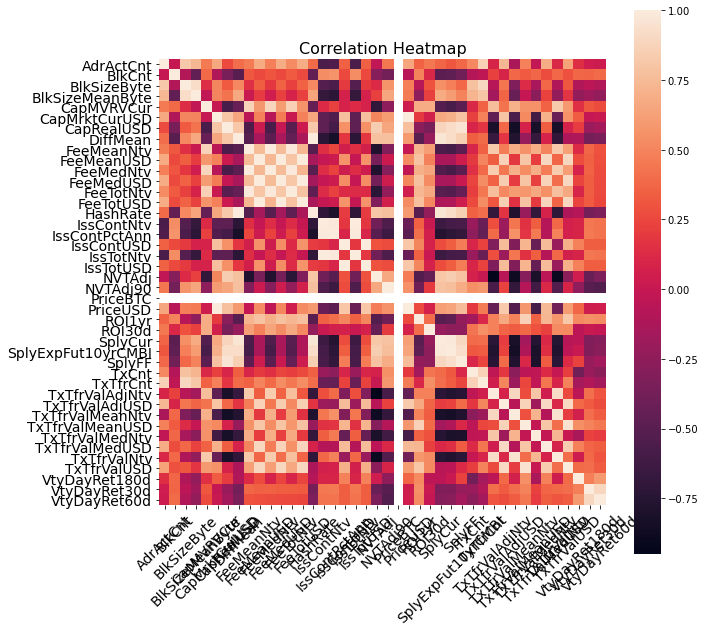

In [171]:
btccorr = btc_clean_after2016.corr()
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=btccorr, square = True, ax=ax)
plt.title('Correlation Heatmap',size = 16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=14,rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=14,rotation=0)
plt.show()

In [172]:
btccorr

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
AdrActCnt,1.00,-0.00,0.82,0.74,0.45,0.66,0.27,0.40,0.47,0.68,...,0.74,-0.13,0.49,-0.03,0.68,0.11,0.64,0.15,0.05,0.03
BlkCnt,-0.00,1.00,-0.09,-0.46,0.39,-0.11,-0.35,-0.51,0.32,0.26,...,0.09,0.38,0.32,0.37,0.27,0.38,0.29,0.37,0.36,0.39
BlkSizeByte,0.82,-0.09,1.00,0.93,0.13,0.51,0.32,0.51,0.15,0.34,...,0.44,-0.32,0.13,-0.14,0.38,-0.10,0.31,-0.10,-0.05,-0.09
BlkSizeMeanByte,0.74,-0.46,0.93,1.00,-0.03,0.50,0.43,0.66,0.01,0.21,...,0.36,-0.43,-0.01,-0.27,0.24,-0.23,0.17,-0.23,-0.18,-0.23
CapMVRVCur,0.45,0.39,0.13,-0.03,1.00,0.00,-0.58,-0.43,0.88,0.59,...,0.42,0.71,0.56,0.56,0.36,0.83,0.60,0.15,0.31,0.27
CapMrktCurUSD,0.66,-0.11,0.51,0.50,0.00,1.00,0.80,0.65,-0.05,0.49,...,0.80,-0.56,0.52,-0.61,0.70,-0.43,0.56,0.33,-0.01,0.01
CapRealUSD,0.27,-0.35,0.32,0.43,-0.58,0.80,1.00,0.82,-0.56,0.02,...,0.38,-0.86,0.08,-0.83,0.34,-0.82,0.09,0.20,-0.20,-0.15
DiffMean,0.40,-0.51,0.51,0.66,-0.43,0.65,0.82,1.00,-0.49,-0.13,...,0.18,-0.77,-0.20,-0.68,0.08,-0.70,-0.11,-0.11,-0.37,-0.34
FeeMeanNtv,0.47,0.32,0.15,0.01,0.88,-0.05,-0.56,-0.49,1.00,0.75,...,0.47,0.69,0.56,0.69,0.50,0.82,0.62,0.12,0.37,0.29
FeeMeanUSD,0.68,0.26,0.34,0.21,0.59,0.49,0.02,-0.13,0.75,1.00,...,0.86,0.19,0.81,0.21,0.90,0.38,0.90,0.27,0.35,0.28


In [186]:
btcconnection = btc_clean_after2016[["AdrActCnt",
                                     "CapMrktCurUSD",
                                     "FeeMeanUSD",
                                     "PriceUSD",
                                     "TxTfrCnt",
                                     "TxTfrValUSD"]]

btcconnection

AdrActCnt  CapMrktCurUSD  FeeMeanUSD  PriceUSD  TxTfrCnt  \
year month                                                             
2017 1      645091.03 14701926130.64        0.37    912.79 614363.87   
     2      674473.32 17241157328.59        0.59   1066.56 636152.89   
     3      684799.42 18312067722.53        0.90   1129.10 647490.32   
     4      691790.70 19859976923.19        0.93   1220.10 670157.33   
     5      795171.77 30839667619.03        2.26   1887.75 747500.74   

             TxTfrValUSD  
year month                
2017 1     1193974753.22  
     2     1199881693.01  
     3     1758107663.95  
     4     1694026617.04  
     5     3420732226.80

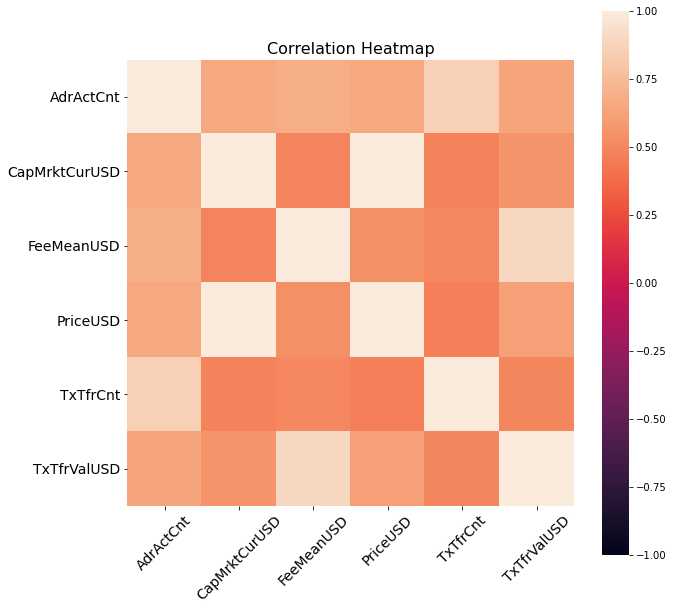

In [175]:
btcnewcorr = btcconnection.corr()
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=btcnewcorr, square = True, ax=ax,vmin=-1,vmax=1)
plt.title('Correlation Heatmap',size = 16)
ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=14,rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=14,rotation=0)
plt.show()

In [283]:
btc_clean_startofcovid = btc_clean_after2016.iloc[11::,:]


#fig,ax = plt.subplots()
#reg2 = sns.regplot(btcconnection["PriceUSD"], btcconnection["AdrActCnt"], ax=ax)
#reg1 = sns.regplot(btc_clean_startofcovid["PriceUSD"], btc_clean_startofcovid["AdrActCnt"], ax=ax)

#X1 = btc_clean_startofcovid.PriceUSD.values.reshape(-1,1)

#model = LinearRegression()
#model.fit(X1, btc_clean_startofcovid.AdrActCnt)

#x1_range = np.linspace(X1.min(), X1.max())
#y1_range = model.predict(x1_range.reshape(-1, 1))

#X2 = btcconnection.PriceUSD.values.reshape(-1,1)

#model = LinearRegression()
#model.fit(X2, btcconnection.AdrActCnt)

#x2_range = np.linspace(X2.min(), X2.max())
#y2_range = model.predict(x2_range.reshape(-1, 1))


#fig = px.scatter(btc_clean_startofcovid,x="PriceUSD",y="AdrActCnt")
#fig.add_traces(go.Scatter(x=x1_range,y=y1_range))

#fig.add_traces(px.scatter(btcconnection,x="PriceUSD",y="AdrActCnt"))
#fig.add_traces(go.Scatter(x=x2_range,y=y2_range))

#fig.show()

In [218]:
#sns.regplot(btcconnection.AdrActCnt, btcconnection.TxTfrValUSD)
#sns.regplot(btcconnection)

<AxesSubplot:xlabel='AdrActCnt', ylabel='TxTfrCnt'>

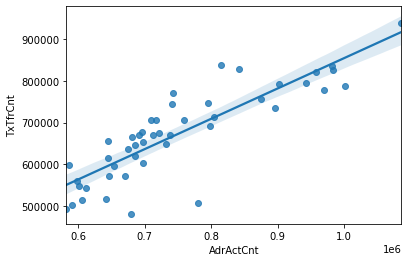

In [219]:
sns.regplot(btcconnection.AdrActCnt, btcconnection.TxTfrCnt)

# Ethereum Analysis

### The process is very similar to btc 

In [47]:
eth = pd.read_csv("eth.csv",index_col = "date", infer_datetime_format=True, parse_dates=True)
eth_cleaning = eth[['AdrActCnt','PriceUSD']].dropna().reset_index()
eth_cleaning.head(5)

,date,AdrActCnt,PriceUSD
0,2015-08-08,1208.00,1.20
1,2015-08-09,1113.00,1.20
2,2015-08-10,1430.00,1.20
3,2015-08-11,2697.00,0.99
4,2015-08-12,1219.00,1.29


In [48]:
year = eth_cleaning['date'].dt.year
month = eth_cleaning['date'].dt.month
day = eth_cleaning['date'].dt.day
date = {"year":year,"month":month,"day":day}

date_date = pd.DataFrame(date)
eth_file = pd.concat([date_date,eth_cleaning],axis="columns",join="outer")
eth_new_new = eth_file#the original naming will not be changed
eth_test = eth_new_new.drop(['date'],axis=1)#new name for the other operations
eth_new = eth_new_new.drop(['day','date'],axis=1)#new name for the other operations
eth_new_new.head(5)

,year,month,day,date,AdrActCnt,PriceUSD
0,2015,8,8,2015-08-08,1208.00,1.20
1,2015,8,9,2015-08-09,1113.00,1.20
2,2015,8,10,2015-08-10,1430.00,1.20
3,2015,8,11,2015-08-11,2697.00,0.99
4,2015,8,12,2015-08-12,1219.00,1.29


In [49]:
avg_month_eth = eth_new.loc[eth_new['year'] > 2015,:].groupby(["year","month"]).mean()
avg_month_eth.head(5)

AdrActCnt  PriceUSD
year month                     
2016 1        3255.90      1.50
     2        5695.10      4.50
     3       10175.84     11.10
     4       12798.20      8.96
     5       17880.13     11.34

In [50]:
eth_new_new["yearmonth"] = eth_new_new["date"].dt.strftime("%Y-%m")

before_and_after_eth = (eth_new_new
                    .reset_index()
                    .drop("day",axis=1)
                    .loc[eth_new_new['year'] > 2018,:]
                    .groupby(["year","month"])
                    .agg({"AdrActCnt":"mean",
                         "PriceUSD":"mean",
                         "yearmonth":"first"})
                    .reset_index()
                    .drop(["year","month"],axis=1)
                    .set_index("yearmonth")
                    )


#before_and_after = pd.concat([date_con,before_and_after],join="outer",axis="columns").drop(["year","month"],axis=1).set_index
before_and_after_eth.head()

,AdrActCnt,PriceUSD
yearmonth,,
2019-01,259837.61,126.80
2019-02,215373.04,125.57
2019-03,267465.26,135.52
2019-04,303846.47,164.85
2019-05,323094.58,219.83


In [51]:
before_and_after_eth_new = before_and_after_eth.iloc[7::,:]
before_and_after_eth_new.head()
before_and_after_eth_new.hvplot.bar(y=["AdrActCnt","PriceUSD"],
                                rot=90,
                                color=["blue","red"],
                                height=600,width=1250,
                                title="Bar Diagram of the Ethereum Price and Address Action Count",
                                xlabel="Year/MOnth",ylabel="Price/Address Action Count")

:Bars   [yearmonth,Variable]   (value)

In [336]:
adrcounteth = before_and_after_eth_new.hvplot.line(x="yearmonth",
                                            y="AdrActCnt",
                                            rot=90,
                                            color=["blue","red"],
                                            title="Ethereum Address Count 2019/08 - 2020/11",
                                            xlabel = "Year/Month",ylabel = "Address Action Count")#,
                                 #height=600,width=1250)
pricecounteth = before_and_after_eth_new.hvplot.line(x="yearmonth",
                                              y="PriceUSD",
                                              rot=90,
                                              color=["blue","red"],
                                              title="Ethereum Price Change 2019/08 - 2020/11",
                                              xlabel = "Year/Month",ylabel="Price in USD")#,
                                 #height=600,width=1250)
adrcounteth + pricecounteth

:Layout
   .Curve.I  :Curve   [yearmonth]   (AdrActCnt)
   .Curve.II :Curve   [yearmonth]   (PriceUSD)

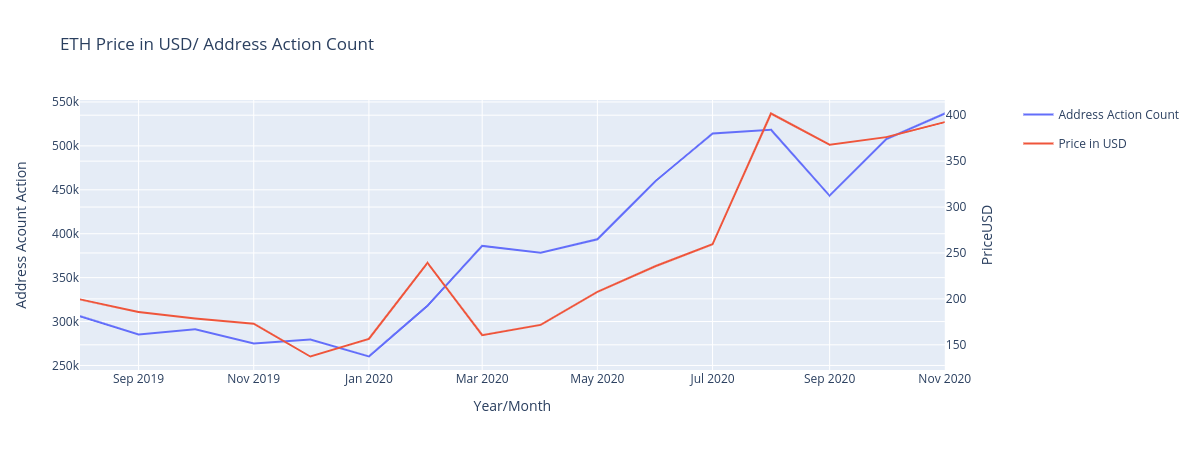

In [63]:
before_and_after_eth_new["address_count"]= "Address Action Count"
before_and_after_eth_new["price"] = "Price in USD"
before_and_after_eth_new = before_and_after_eth_new.reset_index()

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_eth_new, x= "yearmonth", y="AdrActCnt",color="address_count")#, render_mode="webgl",)
fig2 = px.line(before_and_after_eth_new, x="yearmonth", y="PriceUSD", color="price")#, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
#subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "ETH Price in USD/ Address Action Count")
subfig.show()

# Covid Data Analysis

In [52]:
url = "https://api.covid19api.com/world?from=2020-04-14T00:00:00Z&to=2020-04-15T00:00:00Z"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))

### The reason to use a function here is because when first retrieving the covid data, the data was not in time series

### The time order was wrong

### To make sure the data is in the correct order that is needed

### Each date of data was individually retrieved and then append to a new data frame

In [53]:
months = ["04","05","06","07","08","09","10","11"]
days = ["01","02","03","04","05","06","07","08","09",
        "10","11","12","13","14","15","16","17","18","19",
        "20","21","22","23","24","25","26","27","28","29",
        "30","31"]

def retrieve_individual_data(mon,da):
    cur_month = mon
    i = 0
    j = 0
    data = []
    payload = {}
    headers= {}
    
    while i < len(cur_month):
        
        current_month = cur_month[i]
        cur_days = da
        
        if current_month == "04":
            new_days = cur_days[14:29]
        elif current_month == "05":
            new_days = cur_days[0:30]
        elif current_month == "06":
            new_days = cur_days[0:29]
        elif current_month == "07":
            new_days = cur_days[0:30]
        elif current_month == "08":
            new_days = cur_days[0:30]
        elif current_month == "09":
            new_days = cur_days[0:29]
        elif current_month == "10":
            new_days = cur_days[0:30]
        elif current_month == "11":
            new_days = cur_days[0:14]
            
        
        while j < len(new_days):
            
            next_day = int(new_days[j])+1
            if next_day < 10:
                next_day = f"0{next_day}"
            else:
                next_day = next_day
            
            url = f"https://api.covid19api.com/world?from=2020-{cur_month[i]}-{new_days[j]}T00:00:00Z&to=2020-{cur_month[i]}-{next_day}T00:00:00Z"

            response = requests.request("GET", url, headers=headers, data = payload)
            
            res = response.json()
            
            res[0]["Month"] = f"{cur_month[i]}"
            res[0]["Day"] = f"{new_days[j]}"#-{next_day}"
            res[0]["Year"] = f"2020"
            
            data.append(res)
            
            #print(f"months = {current_month}")
            #print(f"days = {new_days[j]} - {next_day}")
            #print(response.json())
            time.sleep(1)
            j+=1
        
        j=0
        
        i+=1
    
    
    return data

individual_day = retrieve_individual_data(months,days)

In [54]:
data_individual = []
i = 0
while i < len(individual_day):
    data_individual.append(individual_day[i][0])
    i+=1

In [55]:
coviddata = pd.DataFrame(data_individual)
coviddata.set_index(["Year","Month","Day"]).reset_index()
coviddata["Date"]= pd.to_datetime(coviddata[["Year","Month","Day"]])
coviddata["covid"]="Covid Data"

In [56]:
coviddata.set_index(["Date","Year","Month","Day"]).reset_index().head(5)

,Date,Year,Month,Day,NewConfirmed,NewDeaths,NewRecovered,TotalConfirmed,TotalDeaths,TotalRecovered,covid
0,2020-04-15,2020,04,15,62833,5665,24489,1837869,110071,444024,Covid Data
1,2020-04-16,2020,04,16,82289,8266,36758,2054826,134152,510380,Covid Data
2,2020-04-17,2020,04,17,96444,9619,31084,2150422,143754,541299,Covid Data
3,2020-04-18,2020,04,18,87137,8726,27085,2155152,149156,490147,Covid Data
4,2020-04-19,2020,04,19,77532,5686,23974,2316388,159478,591653,Covid Data


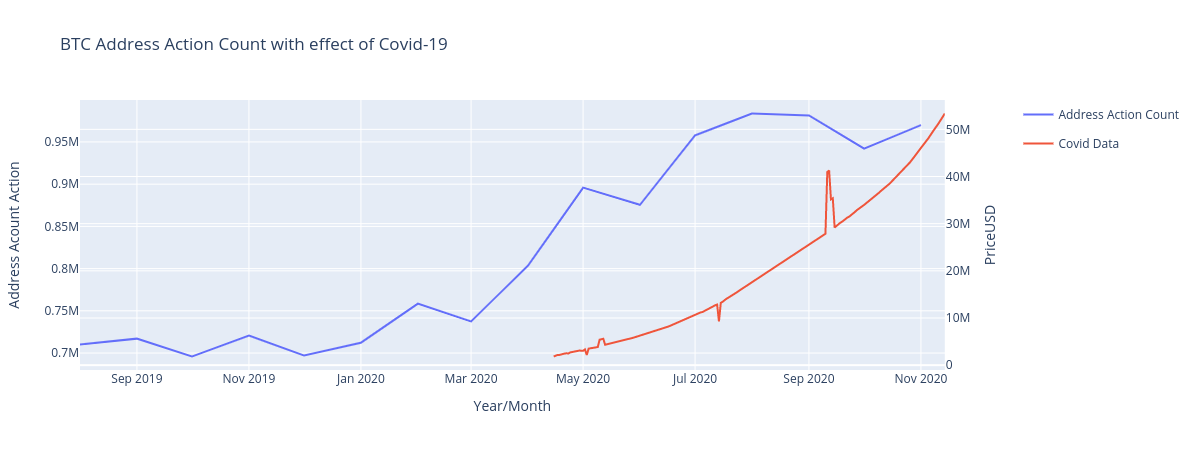

In [59]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])
before_and_after_new = before_and_after_new.reset_index() 

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_new, x= "yearmonth", y="AdrActCnt",color="address_count")#, render_mode="webgl",)
fig2 = px.line(coviddata,x="Date",y="TotalConfirmed", color = "covid")#, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
#subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "BTC Address Action Count with effect of Covid-19")
subfig.show()

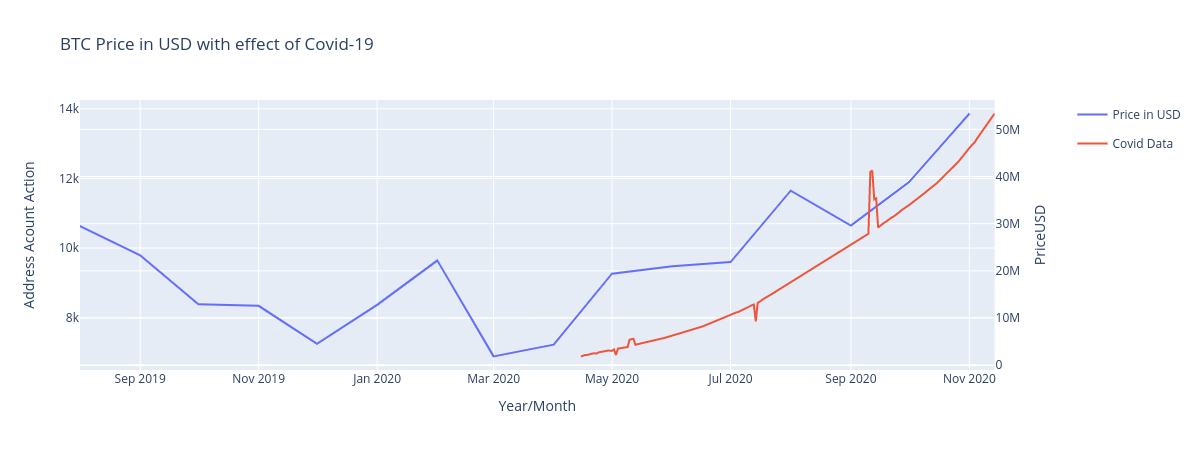

In [60]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_new, x= "yearmonth", y="PriceUSD",color="price")#, render_mode="webgl",)
fig2 = px.line(coviddata,x="Date",y="TotalConfirmed", color = "covid")#, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
#subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "BTC Price in USD with effect of Covid-19")
subfig.show()

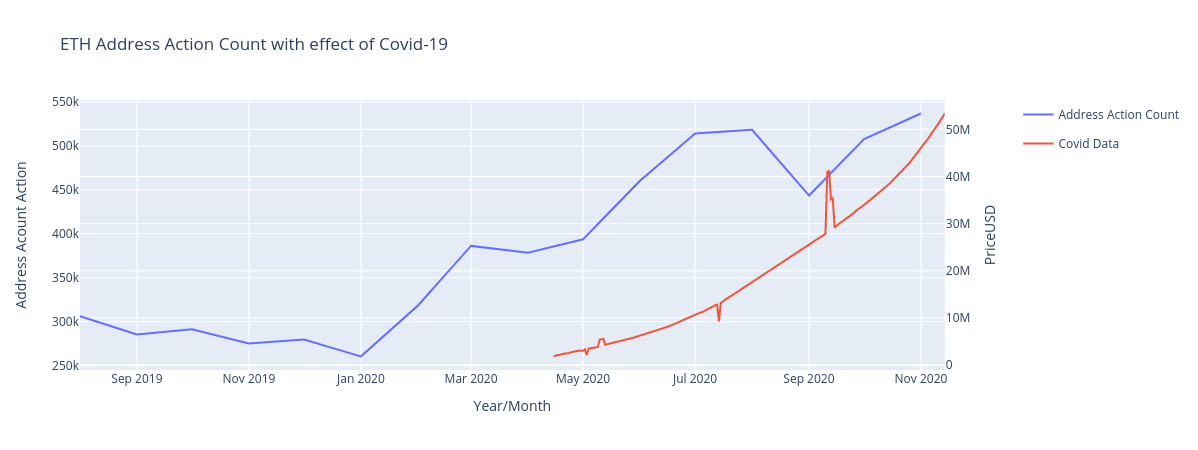

In [64]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])
before_and_after_eth_new = before_and_after_eth_new.reset_index()

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_eth_new, x= "yearmonth", y="AdrActCnt",color="address_count")#, render_mode="webgl",)
fig2 = px.line(coviddata,x="Date",y="TotalConfirmed", color = "covid")#, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
#subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "ETH Address Action Count with effect of Covid-19")
subfig.show()

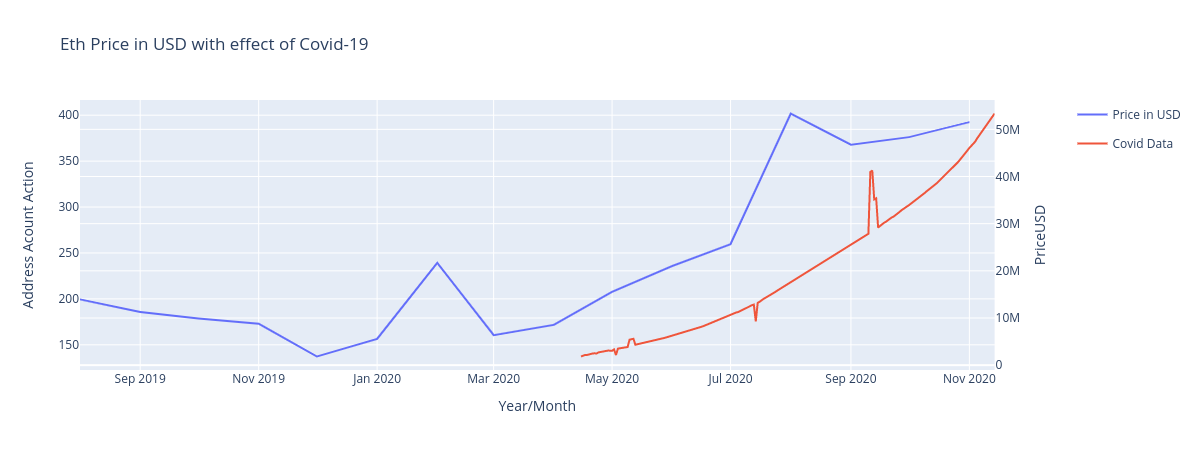

In [65]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(before_and_after_eth_new, x= "yearmonth", y="PriceUSD",color="price")#, render_mode="webgl",)
fig2 = px.line(coviddata,x="Date",y="TotalConfirmed", color = "covid")#, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Year/Month"
subfig.layout.yaxis.title="Address Acount Action"
#subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="PriceUSD"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(title_text = "Eth Price in USD with effect of Covid-19")
subfig.show()

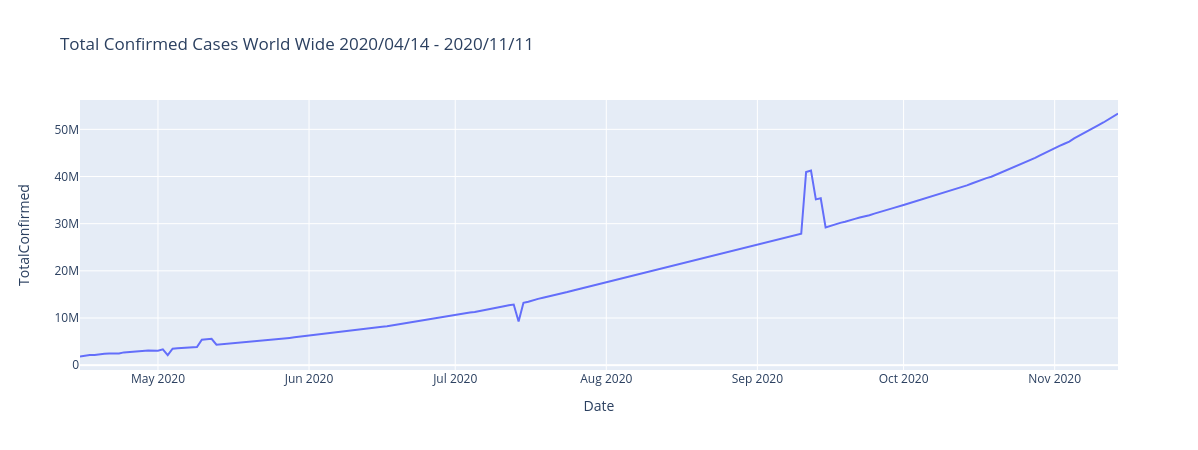

In [66]:
px.line(coviddata,
        x="Date",
        y="TotalConfirmed",title = "Total Confirmed Cases World Wide 2020/04/14 - 2020/11/11")